In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('EV.csv')

In [23]:
df.shape

(74297, 8)

In [24]:
df.columns.nunique()

8

In [25]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [26]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [27]:
# Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Check for Duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Missing Values:
 Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    1
dtype: int64

Number of Duplicate Rows: 0


In [28]:
# Convert columns to appropriate datatypes
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Year'].astype(int)
categorical_columns = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
df[categorical_columns] = df[categorical_columns].astype('category')


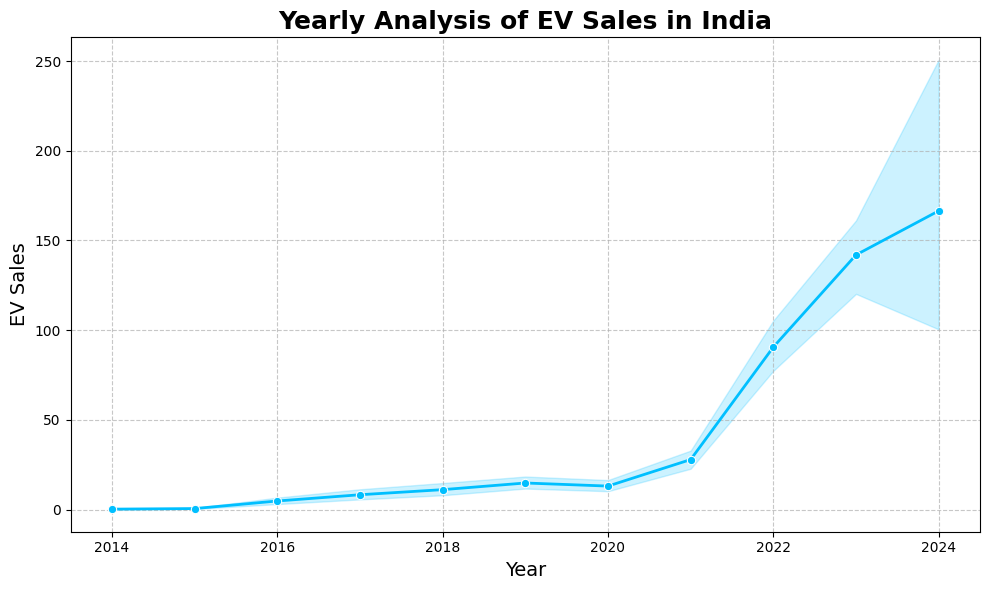

In [29]:
# Yearly Analysis of EV Sales
plt.figure(figsize=(10,6))
plt.title('Yearly Analysis of EV Sales in India', fontsize=18, fontweight='bold')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df, marker='o', color='deepskyblue', lw=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('EV Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

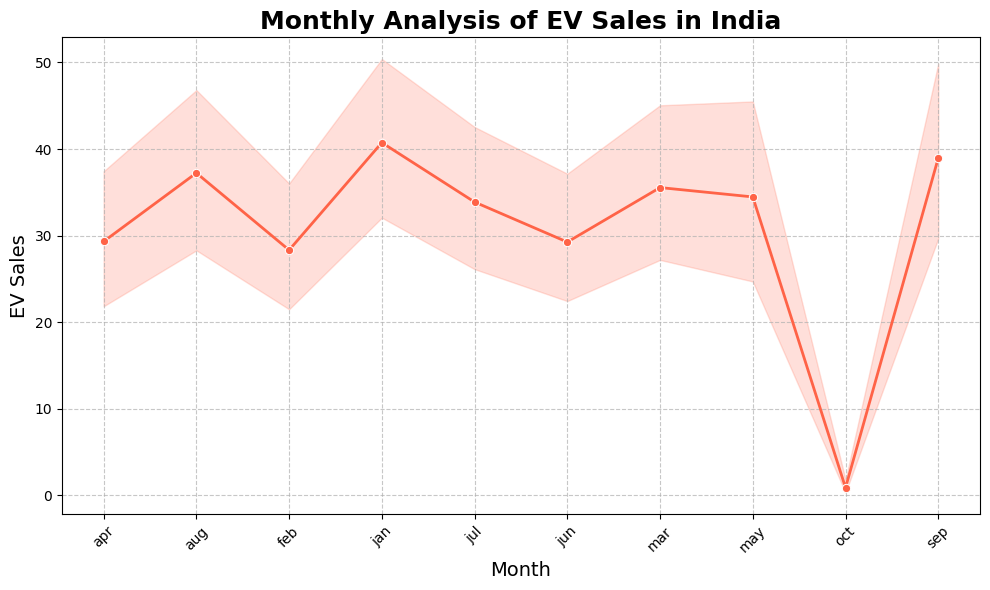

In [30]:
# Monthly Analysis of EV Sales
plt.figure(figsize=(10,6))
plt.title('Monthly Analysis of EV Sales in India', fontsize=18, fontweight='bold')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df, marker='o', color='tomato', lw=2)
plt.xlabel('Month', fontsize=14)
plt.ylabel('EV Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

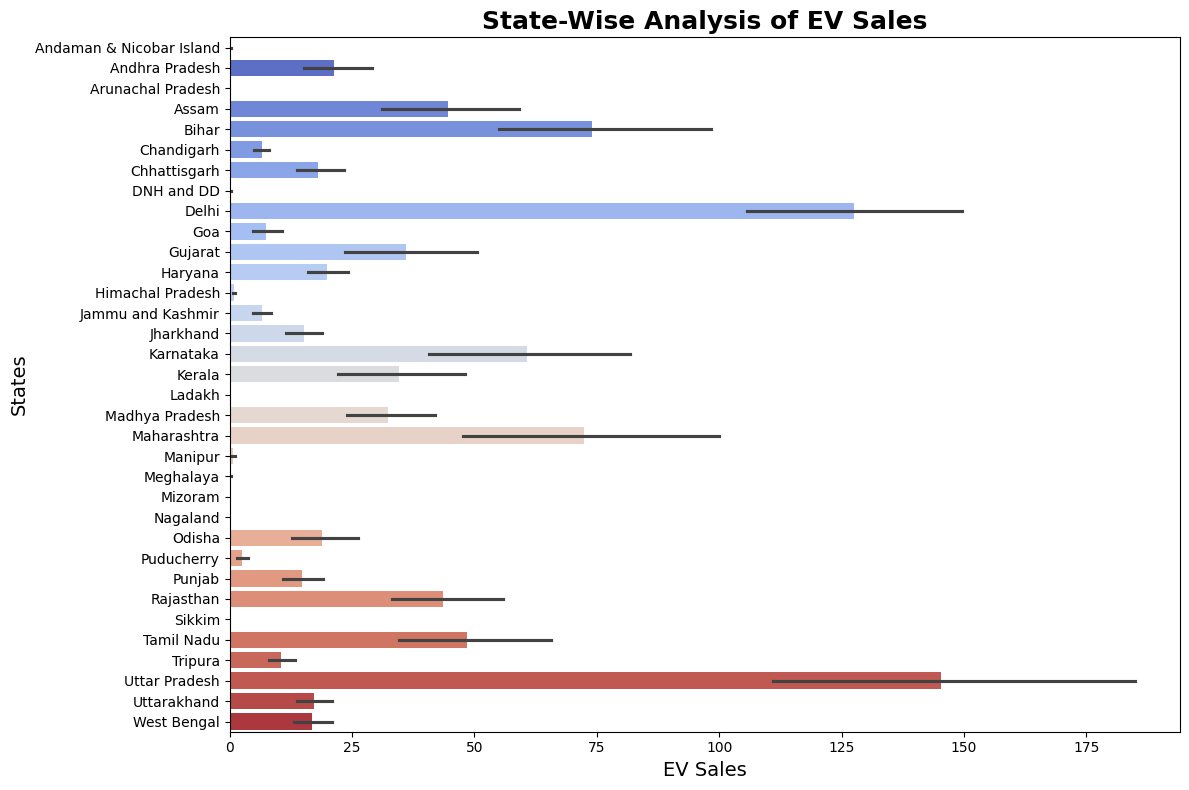

In [31]:
# State-Wise Analysis of EV Sales
plt.figure(figsize=(12,8))
plt.title('State-Wise Analysis of EV Sales', fontsize=18, fontweight='bold')
sns.barplot(y='State', x='EV_Sales_Quantity', data=df, hue='State', dodge=False, palette='coolwarm')
plt.xlabel('EV Sales', fontsize=14)
plt.ylabel('States', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

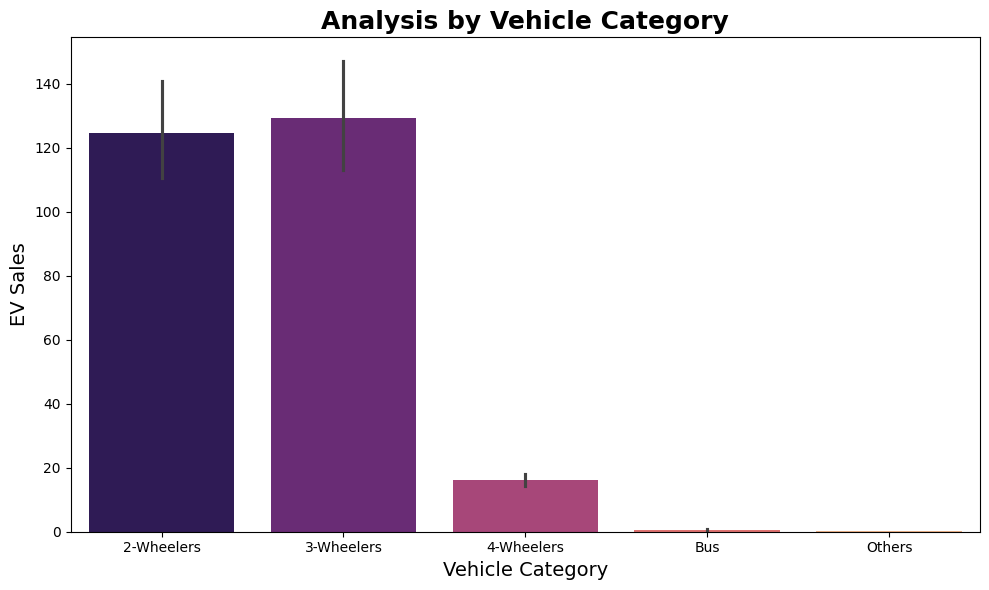

In [33]:
# Analysis by Vehicle Category
plt.figure(figsize=(10,6))
plt.title('Analysis by Vehicle Category', fontsize=18, fontweight='bold')
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, hue='Vehicle_Category', palette='magma')
plt.xlabel('Vehicle Category', fontsize=14)
plt.ylabel('EV Sales', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

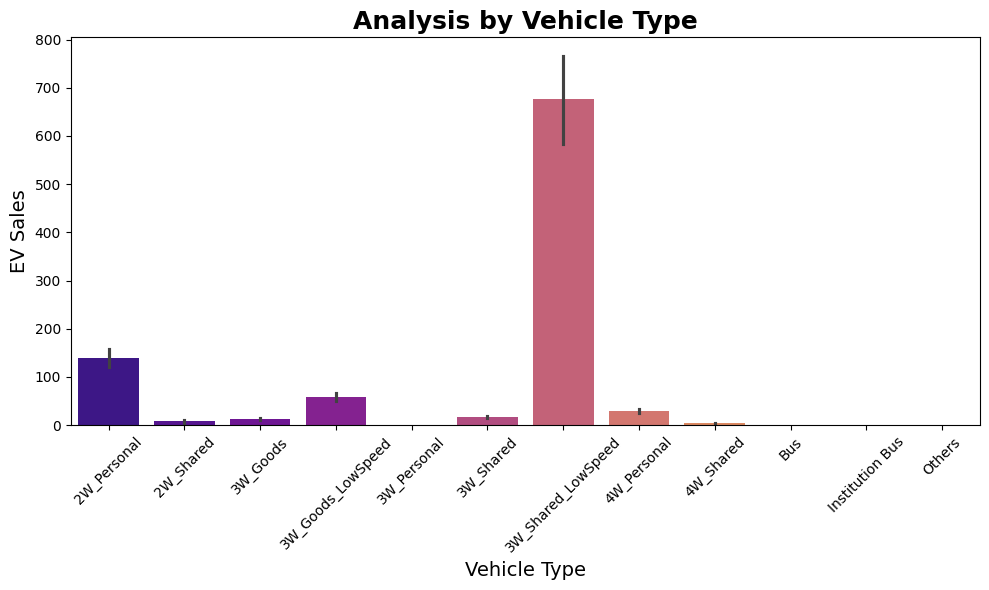

In [34]:
# Analysis by Vehicle Type (2-wheeler vs 4-wheeler)
plt.figure(figsize=(10,6))
plt.title('Analysis by Vehicle Type', fontsize=18, fontweight='bold')
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=df, hue='Vehicle_Type', palette='plasma')
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('EV Sales', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-35-7ade187b9c3a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Cumulative_EV_Sales'] = df.groupby('State')['EV_Sales_Quantity'].cumsum()


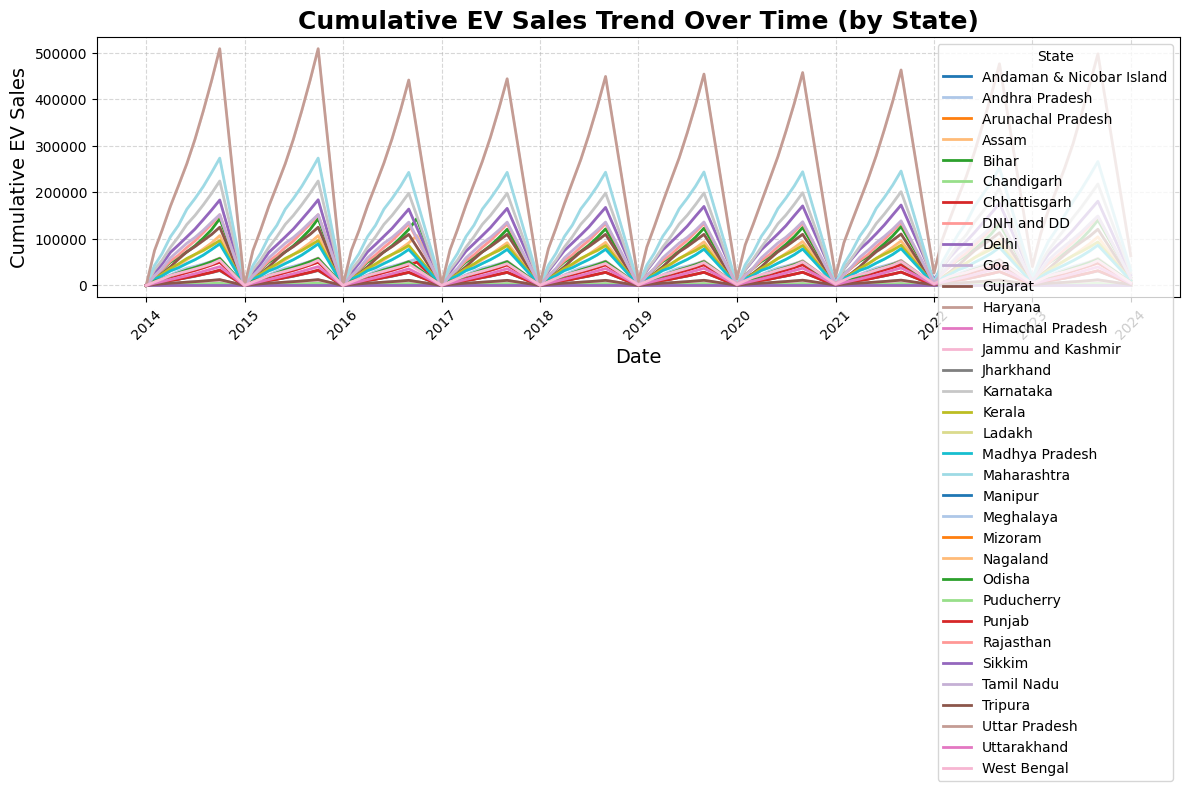

In [35]:
df['Cumulative_EV_Sales'] = df.groupby('State')['EV_Sales_Quantity'].cumsum()

plt.figure(figsize=(12, 6))
plt.title('Cumulative EV Sales Trend Over Time (by State)', fontsize=18, fontweight='bold')
sns.lineplot(x='Date', y='Cumulative_EV_Sales', data=df, hue='State', lw=2, palette='tab20')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative EV Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-40-3be30ee506a9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby(['Month_Name', 'Vehicle_Type']).agg({'EV_Sales_Quantity': 'sum'}).unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

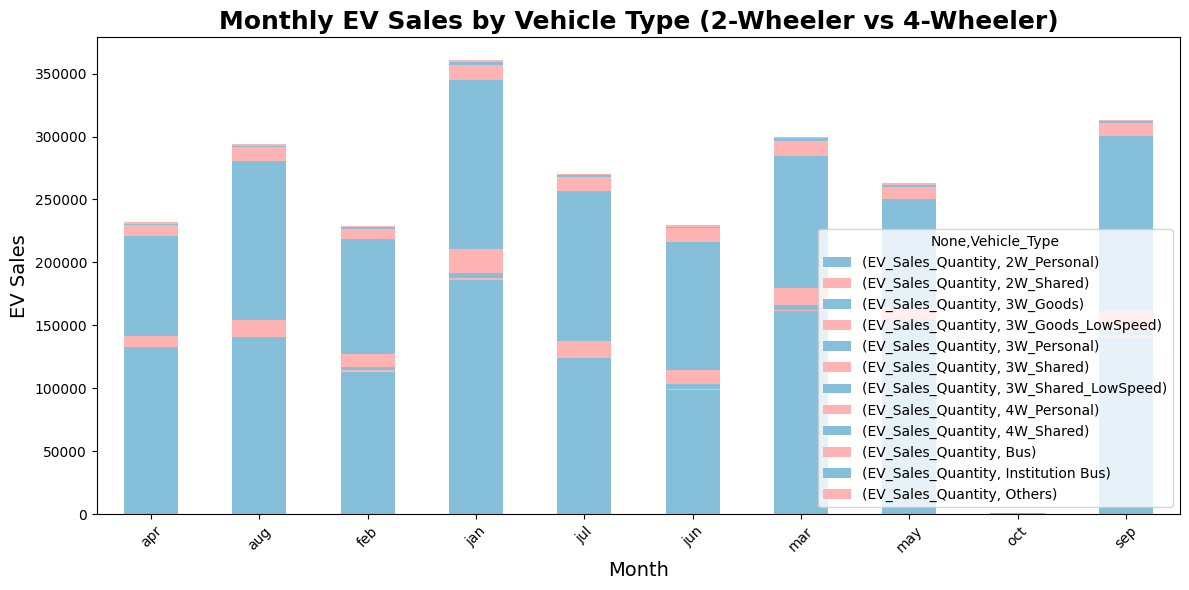

In [40]:
monthly_sales = df.groupby(['Month_Name', 'Vehicle_Type']).agg({'EV_Sales_Quantity': 'sum'}).unstack().fillna(0)

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar', stacked=True, color=['#86bfda', '#ffb3b3'], figsize=(12,6))
plt.title('Monthly EV Sales by Vehicle Type (2-Wheeler vs 4-Wheeler)', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('EV Sales', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
import joblib
joblib.dump(df, 'ev_sales_model.pkl')

['ev_sales_model.pkl']